Auctions without auctioneers - letting bidders themselves run the show, through homomorphic encryption and multiparty computation
============
-----


#  Summary 


The goal of this notebook is to provide a prototype illustrating how homomorphic encryption coupled with multiparty computation would allow mechanism design schemes that do not rely on the "mythical central planner". **For instance auctions ran without an auctioneer acting as trusting third party, but organized by the participating parties themselves**. One can then use such a decentralized auction to automate and improve OTC auctions, for example those operating under BWIC ("bids wanted in competition"), which are **prone to misreporting and collusion/conflicts of interest** (*see for instance "Public Sector Pension Investment Board of Canada v. Saba Capital Management"*).

In fact, we will see further that beyond just improving auctions, **such schemes of "trust and cryptography" can allow many more exchanges of *economic contracts* themselves** - which will better distribute risk and allocate ressources, according to optimal mechanism design principle rather than contingent to regulatory captures and power brokering. Indeed, we will see how **current *institutional* solutions to these mechanism design problem (e.g. creating a trusted third party collecting bids, and guaranteeing their privacy and fair matching) are either too expansive for many potential applications (SME financing for once), or too susceptible to frauds due to strong weaknesses and negative incentives.**


--
# General structure of notebook :

Part I : specify axioms that are required by some econ application  
Part II : specify what each piece of encryption technology brings as potential solution to each of the axioms above  
Part III : using the auction example, see how the different pieces of encryption can be used to improve existing econ applications


--
# Part I : "Hybrid systems of "trust and cryptography" to allow many more exchanges of *economic contracts* themselves - let's define "*contract*" :

Contracts as agreements between agents. 

The different environments in which these contracts are agreed upon define very different types of contracts. For instance one might ask for any given contract whether it is "*an informal or formal contract ? Between agents that personally know each other, or through impersonal markets and third parties ?*" 

Indeed if we look for instance at individual debts - an exemple of such economic contract -, being in a village/roomating economy setting in which neighbours temporally helped you out, without expecting an *exact* financiary repayment at *an exact* time, produce a very different form of contract than if the debt was contracted along impersonal markets with "foreign" entities - people we don't know personally, with whom there is no preexisting history of trust nor incentive for future collaboration - so sets of rules and guarantees are needed to enforce the repayment by the borrower.

Our goal will be to facilitate the transition from the first "natural" village/roomating economy setting to impersonal markets, so that individuals and firms can access more borrowing and lending, insurance, but also consumer services.

**For this transition here we lay out an axiomatic approach of the requirements to be satisfied**. For instance, as mentioned above, sets of rules of guarantees to create trust in the correct execution of the contract. **The correct execution of a contract can be defined as:**
- one as specified originally by the terms of the contract (ie the contract enforces "commitment" on agents, for them to respect the outcomes of it) 
- one that acted on true inputs (and not manipulated/misreported inputs, or lies - ie the contract is manipulation and strategy-proof)
        
**Let's now link these requirements for a "correct" execution of a contract to this contract's life cycle - so that we can see how these requirements translate to within each step of the contract's life cycle.**
        
**1) PRE-TRANSFER : how to negotiate, set up a contract, set up a commitment/collateral scheme** 

*what is required there :* <br/> 
- ways to collect information
- ways to collect information while retaining privacy (FHE-MPC for instance, or trusted third party acting as negotiator/matching engine) 

*potential conflicts between stage 1 and stage 2 :* <br/>
- how to collect/aggregate data that is private
- solutions :     
    - privacy-preserving aggregation/computation
    - setting up a third party with a clear mandate

**2) ACCOUNTING INFRASTRUCTURE** 

*what is required there :*
- some forms of privacy ! (hence the zk "patch" to public ledgers)

*potential conflicts between stage 2 and stage 3 :*
- Michael Lee's example : the agent giving up the asset has to reveal what he has
- solutions :
    - banks will check if you have the balance ("trust the broker dealer", who might sell or reveal your info. Recognized such as on the JP M/or one of these big banks broker dealer platform who have a clear mandate to retain privacy)

**3) TRANSFER INFRASTRUCTURE**

**These three stages can be independantly designed.**

**With the list above detailing a contract's lifecycle, we can see that current issues and areas of improvement mainly lies with the "potential conflicts between stage 1 and stage 2, and that relates to the private nature of sensible information.** 




--
##  So the following problem statement : a lack of information infrastructure for accessible and/or secure financial systems , as a consequence of inadequate handling on private information in current systems

NB : "people don't know what platform" mean - OTC exchanges ? dual matching platform ? 

SME funding problems : many too small to be interesting clients to banks (the required audit work being too costly compared to the amount of funding in question)

Even for big firms : asymmetry in demand when trying to get funding (ex when reaching out to investment banks to organize IPOs)

**Because : the symmetric problem of borrowing and lending (some agents need liquidity, whereas some others have excess liquidity that they want to invest) became asymmetric**, as the borrower *has* to go reach out to potential lenders, which are therefore given some increased negotiation power (they **don't have to** reveal how much they *have* to invest to satisfy their mandate/business objectives, whereas the potential borrower *has* to reveal its funding needs).

**Problems of existing P2P lending platform :** bad security against frauds, capture by some parties, and bad incentives introduced  by business/growth objectives. See sections on problems encountered by institutional solutions like trusted third parties as matching engine.
Existing P2P lending platforms are also "one size fit all solutions" that don't respect the natural truth groups/the heterogeneous nature of company sizes/graphs. It would be better to have a bottom-up solution, in which firms can organize themselves funding platform within their natural group.

Our notebook here outlines a set of solutions to all the above.

**Most important is the definition of a hybrid privacy-preserved information state still accessible to mechanism design optimization computations, in which a piece of information can be kept private while still taking part in some computation.**

This way, we can start outlining a platform on which potential borrowers can enter their funding needs (which will be encrypted right from the start, so kept private all the time to all but themselves), on which potential lenders can enter their lending objectives (which will also be encrypted right from the start, so kept private all the time to all but themselves), and the platform (potentially distributed among all participants, to make it "decentralized" hence secure against capture) performing homomorphic computation (ie computation on top of these encrypted data, which give encrypted results that once decrypted also happen to be the correct results of what these computation on top of unencrypted data would be. More on this in relevant sections below) such as dual matching, ranking, etc.

**So better allocation of resources and risks according to each one's needs.**

Throughout the rest of this notebook we will illustrate this process with the simplest of dual-matching platform, that of an auction (and use them to illustrate both the problems mentioned above and our solution).

--

#  Part II : the use of encryption as a solution to "*misreporting and collusion/conflicts of interest*" :


**For the first part ("*misreporting*"), encryption allows ledgers as financial accounts to be altered with transfers done in a secure way**, which can even ensure privacy (if designed to be so). **For the second part ("*conflicts*"), with encryption we can implement optimized contracts and solutions to multi-agent mechanism design problems**.

In fact, the idea and practice of encryption is ancient, with applications similar to contemporary analogues. **Let us thus describe here through two introductory and historical examples** - that of Mesopotamian clay tokens in sealed envelopes as invoices to accompany the shipment of goods, and that of split English tally sticks to convey debt in such a way as to allow it to be passed through third parties for presentation - **the use of encryption as a solution first to "misreporting" (through Mesopotamian clay tokens) and "conflicts" (through English split tally sticks)**.

- **Encryption and misreporting : the example of *the Mesopotamian clay tokens* :**

The idea behind the clay tokens is that tampering by third parties becomes evident by comparing the actual shipment to the envelope. In cases of cheating attempt by the shipper, either the shipments of goods does not match the tokens in the sealed envelope, or the envelop itself is broken. 

- **Encryption and collusion/conflicts of interest: the example of *the split English tally sticks* :**

The idea behind the willow tally sticks is that the uniquely grained wood branches are spit into matching halves as records of the same underlying transaction. One of the halves remains with the issuer/borrower and the other half given to the original lender investor. The latter circulated in the public as money before redemption, with redemption by a third party extinguishing the original debt, but only when the halves matched (the wood's natural cryptographic function thus guaranteeing that **for each half there's only one and one unique other half, thus preventing problems like double spending** - since reproducing prefectly the natural grain of a split wood branch was considered a hard enough problem).

In this case collusion and conflict of interest can be thought for instance as two people (the "colluded parties") who jointly issue tally sticks, with some arbitrary value on them, without intent of redeeming them back together (so, in a way, printing themselves "free debt/money"). **Indeed, collusion can be seen as two people trying to "beat" the rest of the market together. These two parties will then try to exchange both halves of the split tally to get themselves free money or goods.**

However, by making the two halves of the stick of different lengths - the longer part being called stock and being given to the party which had advanced money (or other items) to the receiver, and the shorter portion of the stick being called foil and being given to the party which had received the funds or goods - and by making these two halves very distinct from each other - so that potential "buyers" can recognize wether the offered half is a debt or a credit - these "freely" generated split tally sticks are prevented from getting "free money or goods". Hence here it is the authentification of each half of the tally stick (as being debtor or creditor) that guaranteed that both the asset and liability sides of the tally sticks will always be respected. The clear and fraud proof accounting hence prevents collusions and conflicts of interest. Similarly, the fact that the original names of the debtors/creditors have been marked on the split tallys guarantee in some ways that the debtor side of the colluding party can't hide, lie about not having it, or refuse to redeem the creditor side of the tally, when presented to him (and people will not accept a tally with brushed/unclear names on it as an authenticate token). 

In this example thus, authentication schemes are what prevent collusion and conflicts of interest. We will see below how this authentication can - hence the interest of privacy-preserving schemes.

Furthermore, let's also note that the untampering property of split tally stick - similar to the clay token example above - also prevents price/quantity manipulation variants, as after one tally stick has been split there's no way to modify the value of only one of its half without modifying the value of the other half.  



##  Systems of "*trust and cryptography*"


In each of these ancient systems, there are thus **elements of trust - first in the sense of *fulfilling a commitment***, for instance in the fact that the borrower will repay the loan to original investor or verified third party. But this commitment problem is furthermore mixed with the need for encryption to deal with nefarious behavior from non-trusted parties in between, that is, surreptitiously pilfering goods or the counterfeiting of promises to pay. **The need of trust thus also further covers the fair functioning of the system** (no misreporting and no possibility of conflict). 

**It is only once *both* elements of trust have been secured that *contracts themselves* can be exchanged on some kind of anonymous dual matching exchanges**, which allows human and village economies to grow into financial and mercantilist economies (USE ELEMENTS OF SME REPORT HERE TO HIGHLIGHT THIS POINT).

**One could thus think of these mechanism design settings as hybrid or mixed systems, with both trust and cryptography**. The trust part is enforced through social conventions (servicing one's debt as a moral matter), while the misreporting and conflict prevention part are solved with cryptography. 

Hybrid systems are likewise used today, for instance through institutional arrangements (think of **trusted third parties operating the dual matching engines, guaranteeing true reporting and fair matching while preserving the privacy of sensible informations that are needed in the process**).



## Issues of "*trust and cryptography*" in the case of existing OTC auctions :


Let's first note **the conflict between the need of *preserving privacy* and the need of a *guarantee of true reporting and conflict-proof process*** . Indeed, in institutional arrangement involving trusted third parties, a door remains open for the *trusted* third party to behave in an unfair or an untruthful way.

Institutional safeguards such as audits have been historically built to prevent this (see literature around village economies as in Townsend, *Medieval village economy* book), but in the case of OTC schemes **the fact that the trusted third party operating the scheme is *also* an active participant on one side of the dual matching engine** (for instance BWIC auctions are often organized by entities looking to sell the asset being the object of the auction) provides strong incentives for misreporting and conflicts of interests.

A classical example in current BWIC auctions - ran over the telephone - would be for the seller of the asset in question (also the organizer of the auction) to tell buyer A : "I prefer you my friend, but buyer B just offered a *slightly* higher price, so if you can just make *sooome* effort the good is yours", and vice versa with buyer B to prop the price up. This entire trick resides in the fact that neither buyer A or B can check the bid of the other buyer, hence have to trust the seller/organizer of the auction.

Hence the need for an auction scheme which provides to the side (of the dual matching exchange) *not organizing or running the auction* ways to solve the trust issues of potential misreporting of potential conflicts.




## Homomorphic encryption, and privacy-preserving audits to make existing mechanism design conflict-proof


- **Homomorphic encryption :**

Homomorphic encryption is **a form of encryption that allows computation on ciphertexts** (encrypted messages), generating an encrypted result which, when decrypted, matches the result of the operations as if they had been performed on the plaintext. I.e., if we perform function f on a message m has been homomorphically encrypted into the ciphertext h(m), we have the equivalence $h^{-1}(f(h(m)))= f(m)$ , or equivalently $f(h(m))=h(f(m))$ .

For example, one can thus perform operations such as addition on underlying messages m1 and m1, or encrypt each to keep them private, sum the encrypted values, and if desired, decipher to get the original sum. 
In short the spaces of underlying messages and encrypted messages are isomorphic , allowing computations on privately-preserved data.  


- **Public/private key encryption :** 

With a public key for encryption and a private key for decryption  of  a message, algorithms on designated spaces make it virtually impossible to decipher an encrypted message without the private key that  was a key in generating it.

However, the public key can be used for authentification and to guarantee integrity and commitment of a message ; in that case, the private key is used to generate a digital signature for a message, and such a signature can be verified by using the signer's corresponding public key. In this way the recipient knows who sent the message. Specifically, the receiver can verify the origin of the message (authentication), that the message has not been modified since it was signed (integrity), and the sender cannot falsely claim that they have not signed the message (non repudiation). To be stressed:  that these are extremely useful properties, all without the receiver ever knowing the private key (hence the content of the encrypted messages).

- **Homomorphic encryption + public/private key encryption :**

Homomorphic encryption with public/private key encryption can thus be used for privacy-preserving outsourced storage and computation. 

Let's for instance go back to our BWIC auction example, in which the seller of an asset organizes an auction scheme. However, **to limit the seller's incentives to misreport, each buyer's bid will be encrypted by him using his unique secret key, to prevent anyone else (especially the seller/organizer of the auction, who agrees to not possess each buyer's individual secret key) from tampering with it** - in a similar fashion as the Mesopotamian clay token example before.  

Furthermore, the organizer of this BWIC auction agrees to ***only provide* the matching (or ranking) operation of this auction, performed homomorphically on top of each buyer's encrypted bid**. The encrypted bids thus protect buyers' privacy in both keeping it untampered with, and potentially by keeping them anonymous (if the public/private keys are allocated randomly to each participating agent) to reduce potential conflict of interest and collusion between the organizer of the auction and some participants.


- **Secret sharing and different potential decryption schemes :**

A question readers might have thought while reading the above would be on "who/how to decrypt the results provided by the matching/ranking engine". Here we will introduce the useful notion of secret sharing (for instance that of Shamir). These are methods for distributing a secret amongst a group of participants, each of whom is allocated a *share* of the secret. The secret can be reconstructed only when a sufficient number, of possibly different types, of shares are combined together; individual shares are of no use on their own.

With such a method the organizer of the auction (or the participants collectively) can then decide on *who* collectively can decrypt the results : that can be each buyer being able to decrypt *all* results, or a combination of *buyers* required to agree to decrypt the results, or a combination of *buyers* and *seller*...

Such choice will mainly be influenced from the choice of the IT infrastructure (who manages the server doing the computation) and the incentives introduced by it. 


- **Getting rid of the central server : multiparty computation**

Multiparty computation is a set of techniques created on top of secret sharing, with the goal of creating methods for parties to jointly compute a function over their inputs while keeping those inputs private. 

In such a setting, all agents will first create a common public/secret key pair together, that matches some collective form of their public/secret keys (with again, the choice of how many of the secret keys are involved, which decide how many of them need to agree to decrypt before decryption is possible). Then each buyer can just send his bid, encrypted with this common public/private key pair, to some or all of the other buyers/sellers. 

And, by passing these bids around, all agents can end up (homomorphically) computing the matching/ranking engine on all bids on their own servers, compare that with one another's results, and when agreed that they have common results, decrypt these results (with again, the choice of how many of them required to agree to decrypt before decryption is possible). 

This way, the central server is not required anymore to perform the matching/ranking engine !

- **Extension to new possible solutions in mechanism design problem, through a hybrid private-but-contributing-state of information**

Let's note furthermore that in the previously described auction scheme, the secrets, the underlying messages before encryption, need never be revealed to the agent or institution performing the matching/ranking operation (if the scheme allows buyers' to keep their secret private keys secret to all but themselves), which can enhance the protection of privacy and could allow for the design of more sophisticated mechanism design scheme allowing hydrid public-private states of information (as **encrypted inputs kept absolutely private can *still* contribute to operations performed homomorphically on top of them, which would provide previously unaccessible information to the mechanism designer/planner - and hence improved computable solutions.)**


--




# Part III : Two misreporting and conflict-proof prototype schemes here, that can be adapted at your workplace :

This notebook provides **two** prototypes of such a misreporting, conflict-proof schemes.

The first is **entirely self-contained in this notebook**, so that you can see both encryption-decryption code for buyers, sellers, and for the matching engine performing the homomorphic encryption. You can then copy-paste and adapt these pieces of code to be run in any fashion between your buyers/sellers, on an architecture/server of your collective choice.

The second is more sophisticated, and **show how the homomorphic encryption scheme can generate keys and signatures that can be sent from one user interface (the notebook here) to another (the server performing the homomorphic encryption** - thus not seeing any of the content of the encrypted messages, but still performing a function which will give the correct output once each party decrypts its resulting message). Here the server will be one coded in Flask, with the entire code accessible at github.something... and hosted by Google cloud - but it could be any server that you, your buyers/sellers agree upon (for instance a server only performing homomorphic encryption as described in the section above, and collectively managed by buyers, or with an audit door for them, would prevent any misreporting or conflict of interest).

The good sold can be anything. We just provided here the prototype to organize such a BWIC auction for selling this good, but without the negative incentives current schemes introduce.


## The homomorphic encryption scheme used here 


**Homomorphic encryption refers to a kind of encryption in which some computation on ciphertexts produces an encryption of the desired computation on the plaintexts** (i.e. f(Enc(messages)) = Enc(f(messages)), in which f can be additive, multiplicative, or more sophisticated functions). 

The Paillier encryption scheme used here is for instance homomorphic over the operation of addition. **Namely, given pk, Enc(pk, m1), Enc(pk, m2) one can efficiently compute Enc(pk, m1 + m2)**. *(see Paillier, Pascal (1999). "Public-Key Cryptosystems Based on Composite Degree Residuosity Classes". EUROCRYPT. Springer. pp. 223–238. doi:10.1007/3-540-48910-X_16)*


<img src="Screen Shot 2020-05-27 at 6.55.54 AM.png" />
<img src="Screen Shot 2020-05-27 at 6.55.08 AM.png" />

## First prototype : the self-contained code all accessible here :

In [1]:
# Importing the Paillier encryption library from https://python-paillier.readthedocs.io

from phe import paillier

# Importing a graphic toolbox to plot the distributions in BWIC auctions
import matplotlib.pyplot as plt


In [2]:
# Now we are starting to build the public and private keys

public_key, private_key = paillier.generate_paillier_keypair()
 
# If we’re going to have lots of private keys lying around, then we can use a keyring on which to store our PaillierPrivateKey instances:
keyring = paillier.PaillierPrivateKeyring()
keyring.add(private_key)

In [3]:
# Let's decide how many buyers are participating to this auction. 
# For now let's say 3. If you want more you can just copy paste the code below by adding the number of player 4, player 5, etc

# Let's create for all 3 of them a public key and private key pair :

public_key1, private_key1 = paillier.generate_paillier_keypair(keyring)
public_key2, private_key2 = paillier.generate_paillier_keypair(keyring)
public_key3, private_key3 = paillier.generate_paillier_keypair(keyring)

# And the list that will receive their three bids :

secret_number_list = [None] * 3

# We are now starting to enter the bids for the good. 

Here below the cells are collapsable, so that each of your 3 bidding buyer can "open" a cell, input their private values in it, then "close" the cell to prevent other players to easily see the value it contains

In [4]:
# Call your bidding buyer 1 and let him enter his bid here (without looking at his value !)

bid_from_player_1 = 13.141592653;

# Let's store that bid in the list of bids
secret_number_list[0] = bid_from_player_1

In [5]:
# Now call your bidding buyer 2 and let him enter his bid here (without looking at his value !)

bid_from_player_2 = 10;

# Let's store that bid in the list of bids
secret_number_list[1]=bid_from_player_2

In [6]:
# Now call your bidding buyer 3 and let him enter his bid here (without looking at his value !)

bid_from_player_3 = 8;

# Let's store that bid in the list of bids
secret_number_list[2]=bid_from_player_3

In [7]:
# Let's now encrypt everything

encrypted_number_list = [public_key.encrypt(x) for x in secret_number_list]
print(encrypted_number_list)
# Now the list of bids has been encrypted using the public key ! It can for instance be revealed without any outside agent being able to decrypt it

[<phe.paillier.EncryptedNumber object at 0x10f210350>, <phe.paillier.EncryptedNumber object at 0x117452c10>, <phe.paillier.EncryptedNumber object at 0x10f1f59d0>]


# A "decentralized auctioneer"

This party does not have access to the private keys, and typically performs operations on supplied encrypted data. It can be a server hosted by the seller, a server hosted by one (or more) of the buyers, or a combination of both. Buyers/seller just need to make sure that this party execute correctly the function assigned to it (here, the ranking) - which is the only thing it can mess (since it doesn't have access to the private keys, it can't tamper with the messages, nor with the identities of the messages senders - which can be kept anonymous if the keys are generated anonymously - for instance via random assignment of public/private key pairs at the start, or any other scheme).

Once this party has received some EncryptedNumber instances, it can perform basic mathematical operations supported by the Paillier encryption, such as:

- Addition of an EncryptedNumber to a scalar
- Addition of two EncryptedNumber instances
- Multiplication of an EncryptedNumber by a scalar

In [8]:
#Let's print out the encrypted number for instance to see that they are indeed "meaningless"

encrypted_number_list

In [9]:
# Let's now see homomorphically (i.e. performing the comparison function on the encrypted data) which one of the bids is higher

bid1_vs_bid2 = encrypted_number_list[0] - encrypted_number_list[1]

# You can see that the result is also encrypted, hence meaningless for the outside agent looking at it
print(bid1_vs_bid2)

## With homomorphic encryption, a piece of code (or a "smart contract") can now perform the role of the auctioneer

Such a code does not have access to the private keys, but can still perform operations on supplied encrypted data, and hence tell all participating agents which one has the highest bid (if in a single round auction), or provide some information between rounds before the bid updating step in a multiround auction (the distribution of bids at each round, the distribution *without the highest bid* at each round...)...

This guarantees truthfulness of the auctioneer, full and transparent reporting of the informations that has been decided to be revealed at the end of each round, and better privacy for the bidders on the rest.

### Example of a single round first-price auction based on the previous 3 bids :

In [10]:
if private_key.decrypt(bid1_vs_bid2)>0:
    bid2_vs_bid3 = encrypted_number_list[0] - encrypted_number_list[2]
    if private_key.decrypt(bid2_vs_bid3)>0:
        print('bidder 1 won the auction')
    else:
        print('bidder 3 won the auction')
        
else:
    bid2_vs_bid3 = encrypted_number_list[1] - encrypted_number_list[2]
    if private_key.decrypt(bid2_vs_bid3)>0:
        print('bidder 2 won the auction')
    else:
        print('bidder 3 won the auction')
    
        

bidder 1 won the auction


### Example of a multiround BWIC auction based on the previous 3 bids :

Each round of the BWIC auction will be based on two steps : first the submission (or the update) of each one's bid, second the revelation of the distribution of the bids **without the highest bid**.

#### Use the cell below for the submission (or the update) of each one's bid at each round

Here below the cells are collapsable, so that each of your 3 friends can "open" a cell, input their private values in it, then "close" the cell to prevent other players to easily see the value it contains

In [15]:
# Call your friend player 1 and let him enter his bid here (without looking at his value !)

bid_from_player_1 = 3.141592653;

# Let's store that bid in the list of bids
secret_number_list[0] = bid_from_player_1

In [16]:
# Now call your friend player 2 and let him enter his bid here (without looking at his value !)

bid_from_player_2 = 10.141592653;

# Let's store that bid in the list of bids
secret_number_list[1] = bid_from_player_2

In [17]:
# Finally call your friend player 3 and let him enter his bid here (without looking at his value !)

bid_from_player_3 = 23.141592653;

# Let's store that bid in the list of bids
secret_number_list[2] = bid_from_player_3

#### Use the cell below to produce the distribution of the bids without the highest bid at the end of each round

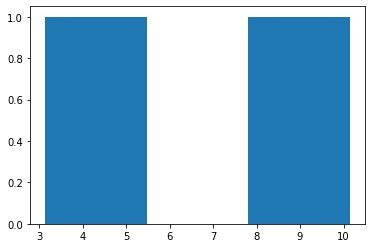

In [20]:
encrypted_number_list = [public_key.encrypt(x) for x in secret_number_list]

bid_distribution_without_highest = [None] * 2
bid1_vs_bid2 = encrypted_number_list[0] - encrypted_number_list[1]

if private_key.decrypt(bid1_vs_bid2)>0:
    bid2_vs_bid3 = encrypted_number_list[0] - encrypted_number_list[2]
    if private_key.decrypt(bid2_vs_bid3)>0:
        
        #if we were in a single round then print('bidder 1 won the auction') 
        bid_distribution_without_highest[0] = secret_number_list[1]
        bid_distribution_without_highest[1] = secret_number_list[2]
    else:
        #if we were in a single round then print('bidder 3 won the auction')
        bid_distribution_without_highest[0] = secret_number_list[0]
        bid_distribution_without_highest[1] = secret_number_list[1]
        
else:
    bid2_vs_bid3 = encrypted_number_list[1] - encrypted_number_list[2]
    if private_key.decrypt(bid2_vs_bid3)>0:
        #if we were in a single round then print('bidder 2 won the auction')
        bid_distribution_without_highest[0] = secret_number_list[0]
        bid_distribution_without_highest[1] = secret_number_list[2]
    else:
        #if we were in a single round then print('bidder 3 won the auction')
        bid_distribution_without_highest[0] = secret_number_list[0]
        bid_distribution_without_highest[1] = secret_number_list[1]
        
plt.hist(bid_distribution_without_highest, bins = 3)
plt.show()


#### Then you can re iterate with your friends over the past two steps, until convergence to a clear winner

## The second prototype : creating bids from this notebook, and sending them to a server (which you as a buyer can audit)


In [1]:
# TO DO

## Appendix 

In this appendix, we give a more detailed description of the cryptographic algorithms used in our "auction without auctioneer" scheme. The intended audience of this section is a reader with a backgroundin lattice cryptography and familiarity with the Ring-Learning with Errors (RLWE) problem. Familiarity with the homomorphic encryption scheme of Brakerski (2012) and Fan and Vercauteren(n.d.) would also be helpful. Familiarity with Asharov et al. (2012) is not necessary to understandthese algorithms.
  
 
The main cryptographic primitive used for our scheme is homomorphic encryption, specifically the scheme of Brakerski (2012) and Fan and Vercauteren (n.d.), from here on referred to as the BFV scheme. Homomorphic operations are defined in this scheme for ciphertexts decryptable with the same secret key. Our approach to designing an MPC algorithm based on the BFV scheme was to design a key generation protocol and corresponding decryption protocol following the work of Asharov et al. (2012), where all parties participating in the MPC protocol could encrypt their data with the same public key, but a ciphertext would only be able to be decrypted if authorization isgiven by all parties. The algorithms described below provide more detail of our specific instantiation of the framework of Asharov et al. (2012).

**Step 0. Distributed Key Generation** :

Let's run our example with two agents, A and B, who want to see whose bid is higher and whose is lower, without relying on a trusted third party but without revealing to each other the exact value of each one's bid.

Consider the standard BFV key generation protocol, which outputs a public-key/secret-key pair of the form 
$$(pk, sk) = \big( (a, \delta),  ( \ s , e ) \big) $$  
  
  
where $a$ and $ \delta$ are two uniformly random samples over the ring $R_q = Z_q[x]/f(x)$ where $f(x)$ is some degree-$n$ polynomial. The error term e is sampled from a discrete Gaussian with large standard deviation (such noise terms are sometimes referred to as ’flooding’ or ’smudging’ terms).Our key generation protocol relies on the common random string (CRS) model and begins with the assumption that all participants have access to the same truly random seed for a pseudorandom number generator (PRNG). All participants then use this seed to generate the same pseudorandom sample $a$ from $R_q$. Each party $i$ then generates the following key pair:
$$ (pk_i, sk_i) = \big( (a, \delta) , (\ s_i, e_i \big) $$  

So agent A has the following key pair :   $$ (pk_a, sk_a) = \big( (a, \delta),  (\ s_a , e_a) \big) $$  

And agent B the following key pair :  $$ (pk_b, sk_b) = \big( (a, \delta) , (\ s_b, e_b) \big) $$  


**Step 1. Multiparty encryption of each agent's bid**

Now that each agent has its unique secret key, while sharing a public key, they can start using these to encrypt their bids. To describe this encryption process we will follow a sequential description, even though the actual order of the sequences don't matter (both can even happen at the same time).

So A (let's say A starts, even though it would be the same if it's B first) : A sends to B its bid $m_a$, obfuscated by its secret key, in the following encrypted message (let's call it $ct_a$ , for ciphertext from A) :

$$ct_a= a \cdot \ s_a + \delta \cdot  m_a + e_a$$ 

B cannot guess (from the security proof of the BFV scheme) the value of A's bid $m_a$. He sends similarly his encrypted bid $m_b$ to A (let's call it $ct_b$ , for ciphertext from B) :

$$ct_b= a \cdot \ s_b + \delta \cdot  m_b + e_b$$ 


**Step 2. Multiparty addition of each agent's bid**

Let's make each agent "add in" his own secret key to the encrypted message he received from the other party. Ie, for agent A, do the operation $ a \cdot \ s_a + e_a + ct_b $ and for agent B the operation $ a \cdot \ s_b + e_b + ct_a $

So now agent A has the new ciphertext (by writing $e_a + e_b = e$, and $s_a + s_b = s$ ):     $ct_b\prime = a \cdot \ s + \delta \cdot  m_b + e $


And agent B has the new ciphertext  $ct_a\prime = a \cdot \ s + \delta \cdot  m_a + e $

And, if both of them resend the ciphertext each one had to the other, then by both can do the operation $ct_a\prime - ct_b\prime = ctFinal =  \delta \cdot (m_a - m_b) $ , which sign reveals which agent's bid was higher at the start.

Let's note that here with only 2 agents it is a limit case that would reveal, by difference, each agent's bid value to each other. For strictly more than 2 agents, this wouldn't be a problem unless some of the agents coordinate (the Byzantine general problem). For just 2 agents, let's see now how $\delta$ can be a value kept secret to each other, hence hiding the real value of both agent's bid.
  

  
## Appendix 1bis : the "auction without auctioneer" between just 2 agents 



We have the previous setting with agents A and B. Let's now introduce a "pseudo agent" C, which can be for instance a server that has been jointly set up by A and B, and then left as a "black box" on its own, ie a "box" whose inputs, whose mechanisms that produces the outputs and whose outputs are entirely known, but with none of the intermediary computation results that are happening within the box being visible to outside parties (A and B included). In a distributed ledger language, C would be a smart contract node. But here we present a more general case than just DLT-based smart contract.
  
  

A and B still have the following key pairs :   $ (pk_a, sk_a) = \big( (a, \delta),  (\ s_a , e_a) \big) $ and $ (pk_b, sk_b) = \big( (a, \delta) , (\ s_b, e_b) \big) $

However, now in step 1 both A and B send their ciphertexts to C, instead of to each other.  Now C can add these two ciphertexts together, to get $ct_c = ct_a + ct_b = a \cdot \ s + \delta \cdot  (m_a + m_b) + e $

C can then ask both A and B to send the following combination of A and B's public and private keys (let's call them $nn_a$ and $nn_b$ for "not so random noise from A" and "not so random noise from B") : $nn_a =  a \cdot \ s_a + e_a$ and $nn_b =  a \cdot \ s_b + e_b$.

$nn_a$ and $nn_b$ have sufficient cryptographic properties (as in BFV) to conceal A and B's private keys $(s_a, e_a)$ and $(s_b, e_b)$, while allowing C to decrypt $ct_c$

Indeed, we have : $nn_a + nn_b = a \cdot \ s + e $ so that $ct_c - (nn_a + nn_b) = \delta \cdot  (m_a + m_b) $ 

Similarly, C can just do the operation $ct_a - nn_a - (ct_b - nn_b) = \delta \cdot  (m_a - m_b)$. And, since we assume that C has "pre-coded" in him :
  
     - "STEP1 TAKE INPUT 1 FROM A, SUBTRACT INPUT 2 FROM A. 
     - STEP2 TAKE INPUT 1 FROM B, SUBTRACT INPUT 2 FROM B. 
     - STEP3 TAKE RESULT FROM STEP1, SUBTRACT RESULT FROM STEP2. 
     - IF RESULT FROM STEP 3 IS POSITIVE THEN AGENT A WON THE AUCTION. ELSE AGENT B WON THE AUCTION." 
     
then C can just announce to both A and B who won, with A and B never seeing the intermediary results of C's computation, hence A and B never seeing anything else than the "not so random noises" and ciphertexts each of them sent to C, which do not reveal their bid values.

  
## Appendix 2 : the hybrid borrowing and lending case 





Let's use the same setting as the previous auction between two agents : we thus have agents A and B, and "pseudo agent" C.

The economic framework is that of Townsend, JPE 1982. 

